In [88]:
#Dependencies
from citipy import citipy
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [89]:
api_key ='e80b948b744b583baae870250194a510'

In [90]:
randCity = []
randCountry = []
loopcnt = 0

#find cities
while len(randCity) < 650 :
    # Loop counter to track number of loops made
    loopcnt +=1
    
    # Random lat
    lat_pos = random.randint(0,2)
    base_lat = random.randint(0,91)
    dec_lat = random.random()/100
    lat = base_lat + dec_lat
    if lat_pos == 1:
        lat = lat * -1
    
    
    # Random lon
    lng_pos = random.randint(0,2)
    base_lng = random.randint(0,181)
    dec_lng = random.random()/100
    lng = base_lng + dec_lng
    if lng_pos == 1:
        lng = lng * -1
    #print(f"The longitude is: {lng}") 
    
    # Citipy file to get nearest city based on random lat and lng
    city = citipy.nearest_city(lat, lng)
    
    # see if the random city is already in the list if not add
    foundCity = False
    for x in range(len(randCity)):
        if city.city_name == randCity[x]:
            foundCity = True
    if foundCity==False  :   
        randCity.append(city.city_name)
        randCountry.append(city.country_code)

In [91]:
# api.openweathermap.org/data/2.5/weather?lat=35&lon=139
def get_current_weather(df_object):
    api_key = 'e80b948b744b583baae870250194a510'
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {'APPID': api_key,
              'lat': df_object.lat,
              'lon': df_object.lon,
              'units': 'Imperial'
             }
    data =requests.get(base_url, params=params)
    return data.json()
    time.sleep(.50)
    

In [92]:
# Build query Url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = 'e80b948b744b583baae870250194a510'
units = "imperial"

query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

In [93]:
#test api

print(query_url+ 'Denver')

http://api.openweathermap.org/data/2.5/weather?appid=e80b948b744b583baae870250194a510&units=imperial&q=Denver


In [94]:
# Loop through the cities and perform request for data on each
search_data = []
cityList = []
countryList = []

searchCnt = 0
for city in randCity:
    searchCnt += 1
    print(f"Processing record {searchCnt} for the city: {city}")   
    response = requests.get(query_url + city).json()
    searchCityID = response.get("id")
    if response.get("id"):
        print(f"     Record found for city: {city}    city id: {searchCityID}")
        search_data.append(response)
        cityList.append(city)
        countryList.append(randCountry[searchCnt-1])
    else:
        print(f"     No weather record found for city: {city}")
          

Processing record 1 for the city: gwadar
     Record found for city: gwadar    city id: 1177446
Processing record 2 for the city: lorengau
     Record found for city: lorengau    city id: 2092164
Processing record 3 for the city: soldotna
     Record found for city: soldotna    city id: 5874678
Processing record 4 for the city: barentsburg
     No weather record found for city: barentsburg
Processing record 5 for the city: vaini
     Record found for city: vaini    city id: 1273574
Processing record 6 for the city: punta arenas
     Record found for city: punta arenas    city id: 3874787
Processing record 7 for the city: tuktoyaktuk
     Record found for city: tuktoyaktuk    city id: 6170031
Processing record 8 for the city: busselton
     Record found for city: busselton    city id: 2075265
Processing record 9 for the city: tiksi
     Record found for city: tiksi    city id: 2015306
Processing record 10 for the city: chokurdakh
     Record found for city: chokurdakh    city id: 212612

     Record found for city: progreso    city id: 3440963
Processing record 84 for the city: eyl
     Record found for city: eyl    city id: 60019
Processing record 85 for the city: petropavlovsk-kamchatskiy
     Record found for city: petropavlovsk-kamchatskiy    city id: 2122104
Processing record 86 for the city: albany
     Record found for city: albany    city id: 5106834
Processing record 87 for the city: elat
     Record found for city: elat    city id: 2232283
Processing record 88 for the city: hobyo
     Record found for city: hobyo    city id: 57000
Processing record 89 for the city: badulla
     Record found for city: badulla    city id: 1250615
Processing record 90 for the city: nishihara
     Record found for city: nishihara    city id: 1850144
Processing record 91 for the city: abu jubayhah
     No weather record found for city: abu jubayhah
Processing record 92 for the city: ushtobe
     Record found for city: ushtobe    city id: 1517637
Processing record 93 for the city: 

     Record found for city: awjilah    city id: 88533
Processing record 166 for the city: phan thiet
     Record found for city: phan thiet    city id: 1571058
Processing record 167 for the city: east london
     Record found for city: east london    city id: 1006984
Processing record 168 for the city: skiros
     No weather record found for city: skiros
Processing record 169 for the city: shingu
     Record found for city: shingu    city id: 1847947
Processing record 170 for the city: yeppoon
     Record found for city: yeppoon    city id: 2142316
Processing record 171 for the city: liverpool
     Record found for city: liverpool    city id: 2644210
Processing record 172 for the city: asau
     No weather record found for city: asau
Processing record 173 for the city: havoysund
     Record found for city: havoysund    city id: 779622
Processing record 174 for the city: san patricio
     Record found for city: san patricio    city id: 3437029
Processing record 175 for the city: sherida

     Record found for city: ahlat    city id: 325103
Processing record 247 for the city: viligili
     No weather record found for city: viligili
Processing record 248 for the city: solnechnyy
     Record found for city: solnechnyy    city id: 2016307
Processing record 249 for the city: vieira de leiria
     Record found for city: vieira de leiria    city id: 2261673
Processing record 250 for the city: neryungri
     Record found for city: neryungri    city id: 2019309
Processing record 251 for the city: esperance
     Record found for city: esperance    city id: 3573739
Processing record 252 for the city: metro
     Record found for city: metro    city id: 1635283
Processing record 253 for the city: lerwick
     Record found for city: lerwick    city id: 2644605
Processing record 254 for the city: klyuchi
     Record found for city: klyuchi    city id: 1503153
Processing record 255 for the city: tecoanapa
     Record found for city: tecoanapa    city id: 3532499
Processing record 256 

     Record found for city: manono    city id: 209598
Processing record 329 for the city: tongliao
     Record found for city: tongliao    city id: 2034400
Processing record 330 for the city: korla
     No weather record found for city: korla
Processing record 331 for the city: gambela
     Record found for city: gambela    city id: 337405
Processing record 332 for the city: gazojak
     Record found for city: gazojak    city id: 1514792
Processing record 333 for the city: san cristobal
     Record found for city: san cristobal    city id: 3652462
Processing record 334 for the city: isiro
     Record found for city: isiro    city id: 215771
Processing record 335 for the city: ust-kut
     Record found for city: ust-kut    city id: 2013923
Processing record 336 for the city: sidhi
     Record found for city: sidhi    city id: 1256369
Processing record 337 for the city: port elizabeth
     Record found for city: port elizabeth    city id: 4501427
Processing record 338 for the city: codri

     Record found for city: road town    city id: 3577430
Processing record 411 for the city: umzimvubu
     No weather record found for city: umzimvubu
Processing record 412 for the city: sechura
     Record found for city: sechura    city id: 3691954
Processing record 413 for the city: puerto escondido
     Record found for city: puerto escondido    city id: 3520994
Processing record 414 for the city: coolum beach
     Record found for city: coolum beach    city id: 2170581
Processing record 415 for the city: duluth
     Record found for city: duluth    city id: 5024719
Processing record 416 for the city: hofn
     Record found for city: hofn    city id: 2630299
Processing record 417 for the city: victoria
     Record found for city: victoria    city id: 1733782
Processing record 418 for the city: chulym
     Record found for city: chulym    city id: 1507679
Processing record 419 for the city: batken
     Record found for city: batken    city id: 1528735
Processing record 420 for the

     Record found for city: dharur    city id: 1272819
Processing record 493 for the city: tolosa
     Record found for city: tolosa    city id: 3108008
Processing record 494 for the city: northam
     Record found for city: northam    city id: 2641434
Processing record 495 for the city: qunduz
     No weather record found for city: qunduz
Processing record 496 for the city: groton
     Record found for city: groton    city id: 5281020
Processing record 497 for the city: virginia beach
     Record found for city: virginia beach    city id: 4791259
Processing record 498 for the city: leshan
     No weather record found for city: leshan
Processing record 499 for the city: bafra
     No weather record found for city: bafra
Processing record 500 for the city: manzanillo
     Record found for city: manzanillo    city id: 3547867
Processing record 501 for the city: uray
     Record found for city: uray    city id: 1488429
Processing record 502 for the city: silifke
     Record found for city

     Record found for city: baykit    city id: 1510689
Processing record 576 for the city: anzhero-sudzhensk
     Record found for city: anzhero-sudzhensk    city id: 1511494
Processing record 577 for the city: lowestoft
     Record found for city: lowestoft    city id: 2643490
Processing record 578 for the city: nara
     Record found for city: nara    city id: 1855612
Processing record 579 for the city: shenjiamen
     Record found for city: shenjiamen    city id: 1795632
Processing record 580 for the city: tiarei
     Record found for city: tiarei    city id: 4033356
Processing record 581 for the city: panvel
     Record found for city: panvel    city id: 1260434
Processing record 582 for the city: boa vista
     Record found for city: boa vista    city id: 3664980
Processing record 583 for the city: temaraia
     No weather record found for city: temaraia
Processing record 584 for the city: hanyang
     Record found for city: hanyang    city id: 1798537
Processing record 585 for th

In [95]:
#print(json.dumps(search_data[2], indent=4))
len(search_data)


577

In [96]:
#pull in lat long and humidity, cloud, wind speed, temp

lat_data = [data.get("coord").get("lat") for data in search_data]
lng_data = [data.get("coord").get("lon") for data in search_data]
temp_data = [data.get("main").get("temp") for data in search_data]
humid_data = [data.get("main").get("humidity") for data in search_data]
cloud_data =[data.get("clouds").get("all") for data in search_data]
wind_data = [data.get("wind").get("speed") for data in search_data]

In [97]:
#dataFrame with items pulled
weather_data = pd.DataFrame({"cityName":cityList,
                            "country":countryList,
                            "lat":lat_data,
                            "lng":lng_data,
                            "temp":temp_data,
                            "humidity":humid_data,
                            "cloudiness":cloud_data,
                            "winds":wind_data})

In [98]:
weather_data = weather_data[["cityName","country","lat","lng","temp","humidity","cloudiness","winds"]]
weather_data.head()

,cityName,country,lat,lng,temp,humidity,cloudiness,winds
0,gwadar,pk,25.12,62.33,85.81,97,76,4.74
1,lorengau,pg,-2.02,147.27,82.12,100,64,4.18
2,soldotna,us,60.48,-151.07,52.65,54,90,10.29
3,vaini,to,15.34,74.49,67.88,100,88,4.72
4,punta arenas,cl,-53.16,-70.91,33.80,100,90,10.29


In [99]:
# Save weather data to csv file
weather_data.to_csv("weatherdata.csv", encoding="utf-8", index=False)

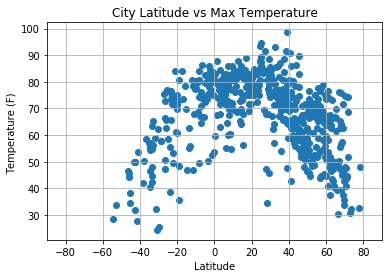

In [100]:
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")
# Show plot
plt.show()


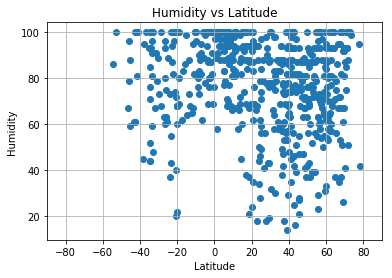

In [101]:
# Latitude vs Humidity
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Add chart labels
plt.title("Humidity vs Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

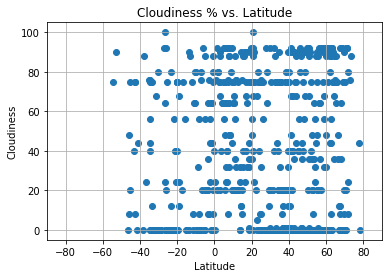

In [102]:

# Latitude vs Cloudiness
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Add chart labels
plt.title("Cloudiness % vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

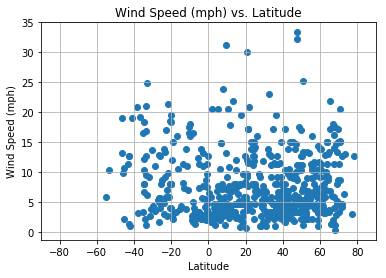

In [103]:
# Latitude vs Wind Speed
plt.scatter(weather_data["lat"], weather_data["winds"], marker="o")

# Add chart labels
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_WindSpeed.png")

# Show plot
plt.show()